<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Fiap-logo-novo.jpg" width="150" align="left"/>

<br/><br/>

<font size=7 color="#ed145b"> <b>Poágilers:</b></font><br>
<font size=4 color="#ed145b"> Daniel Sanchez Melero - 85109</font><br>
<font size=4 color="#ed145b"> Giovanna de Mello Leiva - 85817</font><br>
<font size=4 color="#ed145b"> Larissa Alves da Silva - 86351</font><br>
<font size=4 color="#ed145b"> Kaue Augusto Miranda Santos - 85707</font><br>
<font size=4 color="#ed145b"> Henrique Neves Lago - 84549</font><br>
<font size=4 color="#ed145b"> Eric Luiz Campos Pessoa - 86405</font><br>

### **Introdução**

Em um primeiro momento, precisamos explicar os dados para entendermos o contexto em que se encontram.

Foram criados determinados índices para a análise da vegetação, que são combinações aritméticas de duas ou mais bandas relacionadas com características espectrais da vegetação. Índices de vegetação, como o NDVI (Normalized Difference Vegetation Índex) e o SAVI (Soil Adjusted Vegetation Index), são amplamente utilizados para o monitoramento fenológico e classificação da vegetação, e também para o estudo dos parâmetros estruturais da vegetação.

### **Definição do Problema**

Realizar a seleção de linhagens de tomateiros, classificando se um tomate tem ou não resistência a _Phytophthora infestans_.


Em um primeiro momento, precisamos explicar os dados para entendermos o contexto em que se encontram. Para isso, preparamos um breve texto introdutório a fim de estabelecer a linha de raciocínio que culminou nas análises e modelos aplicados neste notebook.

### **Explicação dos dados**
Existem por volta de cem índices espectrais (tirando o mais utilizado, o NDVI) que são amplamente usados para analisar a vegetação.

Cada índice é basicamente uma certa combinação (fórmula) das propriedades de reflectância medida por sensor (conteúdo de água, conteúdo de clorofila, pigmento, etc.) com 2 ou mais comprimentos de onda que mostra características particulares da vegetação. A medida que o sensor avança, os satélites que observam a Terra fornecem aos especialistas o sensoriamento remoto com dados novos para alimentar as pesquisas e melhorar as análises existentes.

**NDVI - Normalized Difference Vegetation Índex** <br>
    O índice de vegetação de diferença normalizada ( NDVI ) é um indicador gráfico simples que pode ser usado para analisar medições de sensoriamento remoto, avaliando se o alvo sendo observado contém ou não vegetação verde viva.
    É o mais comum na agricultura, caracteriza a densidade da vegetação e permite aos agricultores avaliar a germinação, o crescimento, a presença de ervas daninhas ou doenças, bem como prever a produtividade dos campos.
    Os indicadores de índice são gerados por meio de imagens de satélite de massa verde, que absorvem as ondas eletromagnéticas na faixa do vermelho visível e as reflete na faixa do infravermelho próximo. A região vermelha do espectro (0,62 - 0,75 μm) é responsável pela absorção máxima da radiação solar pela clorofila, e a zona do infravermelho próximo (0,75 - 1,3 μm) tem a reflexão máxima de energia pela estrutura celular da folha. Ou seja, a alta atividade fotossintética leva a valores mais baixos dos coeficientes de reflexão na região vermelha do espectro e a valores maiores na região do infravermelho próximo do espectro. A proporção desses indicadores entre si permite separar claramente a vegetação de outros objetos naturais.
    Como interpretar o NDVI?
    Os valores negativos de NDVI (valores próximos de -1) correspondem à água. Valores próximos de zero (-0,1 a 0,1) geralmente correspondem a áreas áridas de rocha, areia ou neve. Por último, valores baixos e positivos representam arbustos e pastagens (aproximadamente 0,2 a 0,4), enquanto valores altos indicam florestas temperadas e tropicais (valores próximos a 1). Embora o índice admita ir de -1 a 1, mesmo em áreas urbanas mais densamente povoadas o valor do NDVI normal é positivo, embora próximo de zero. Valores negativos são mais propensos a serem perturbações na atmosfera e oriundos de alguns materiais específicos.

**SAVI - Soil Adjusted Vegetation Index** <br>
    SAVI (Soil Adjusted Vegetation Index) é usado para corrigir o Índice de Vegetação por Diferença Normalizada (NDVI) para a influência do brilho do solo onde a cobertura vegetal é baixa.Em áreas onde a cobertura vegetal é baixa (ou seja, <40%) e a superfície do solo está exposta e a refletância da luz no espectro vermelho e infravermelho próximo pode influenciar os valores do índice de vegetação. Isso é especialmente problemático quando as comparações estão sendo feitas em diferentes tipos de solo que podem refletir diferentes quantidades de luz nos comprimentos de onda vermelho e infravermelho próximo (ou seja, solos com diferentes valores de brilho). Este índice produz valores entre -1,0 e 1,0 pois é baseado no NDVI, sendo que seu resultado é, basicamente, um NDVI com o brilho corrigido do solo.

**Índice GNDVI (Green Normalized Difference Vegetation Index)** <br>
    O Índice GNDVI (Vegetação de Diferença Normalizada Verde) é um índice de atividade "verde" ou fotossintética da planta. É semelhante ao NDVI, exceto que, em vez do espectro vermelho, ele mede o espectro verde na faixa de 0,54 a 0,57 mícrons. É um dos índices de vegetação mais utilizados para determinar a captação de água e nitrogênio, sendo um indicador da atividade fotossintética da cobertura vegetal. 
    Os valores lançados por esse índice também variam de -1 a 1. Valores entre -1 e 0 estão associados à presença de água ou solo nu. É mais frequentemente usado para avaliar o teor de umidade e a concentração de nitrogênio nas folhas das plantas de acordo com dados multiespectrais que não têm um canal vermelho extremo. Em comparação com o índice NDVI, é mais sensível à concentração de clorofila, usado na avaliação de vegetação deprimida e envelhecida.

**Simples Razão (SR - Simple Ratio)**<br>
    O índice de vegetação da Simples Razão (SR - Simple Ratio) é um índice baseado na razão entre uma banda, onde os valores dos dados crescem com o aumento da vegetação (infravermelho próximo) e outra banda, na qual os valores decrescem com o aumento da vegetação (vermelho), produzindo um parâmetro que é altamente sensível à presença de vegetação. Este é o VI mais simples, que é uma razão entre a refletância registrada nas bandas do infravermelho próximo (NIR) e vermelho. Esta é uma maneira rápida de distinguir folhas verdes de outros objetos na cena e estimar a biomassa relativa presente na imagem. Além disso, este valor pode ser muito útil para distinguir vegetação estressada de áreas não estressadas. De acordo com a assinatura espectral das folhas verdes, elas exibem refletância muito baixa nas regiões Vermelha e Azul (as folhas refletem mais na região verde e, portanto, aparecem verdes). No entanto, a refletância é relativamente maior na região NIR. Assim, o valor SR é próximo a 1 quando o objeto tem refletância semelhante nas bandas vermelha e NIR - por exemplo, solo. Ao passo que, para um objeto verde, o valor seria muito maior do que 1. 

**MCARI - (Modified Clorophyll Absortion in the Reflectance Index)**
    O MCARI fornece uma medida da profundidade da absorção da clorofila e é muito sensível às variações nas concentrações de clorofila, bem como às variações no Índice de Área Foliar (IAF). Os valores MCARI não são afetados pelas condições de iluminação, a refletância de fundo do solo e outros materiais não fotossintéticos observados. Geralmente, valores elevados de MCARI indicam baixo teor de clorofila na folha.

#### Referências:<br>
<font size = "2">Dias, F.O. 2020. Modelagem de tendências espaciais na seleção de linhagens de tomateiro resistentes à Phytophthora infestans (Mont.) de Bary. pp. 49. Dissertação de Mestrado da Universidade Federal de Viçosa, Departamento de Agronomia, Orientador: Carlos Nick.</font>

<font size = "2">Valente, S. 2021. Machine Learning na Agricultura Digital - Palestra ministrada no canal 
GITAP Feagri na disciplina "AP425 - Agricultura de Precisão" da FEAGRI/UNICAMP em 30/06/2021 - YouTube - Acessado em: 12/11/2021 - https://www.youtube.com/watch?v=BArTmD1tb_g</font>

<font size = "2">Galeria de índices. ArcGIS Pro, ESRI. 2018. http://pro.arcgis.com/en/pro-app/help/data/imagery/indices-gallery.htm .
Acessado em 10 de novembro de 2021 - traduzido para o português.</font>

<font size = "2">Huete, AR, 1988, "Um índice de vegetação ajustado ao solo (SAVI)," Remote Sensing of Environment, Vol 25, 295-309. "(ESRI, 2018) - traduzido para o português.</font>

<font size = "2">Índice de vegetação de diferença normalizada - Wikipédia - Acesso em: 11/11/2021 - https://en.wikipedia.org/wiki Normalized_difference_vegetation_index - traduzido para o português.</font>

<font size = "2">Índices de vegetação NDVI, EVI, GNDVI, CVI, True color. Acesso em: 11/11/2021 - https://www.soft.farm/en/blog/vegetation-indices-ndvi-evi-gndvi-cvi-true-color-140 (01/05/2015) - traduzido para o português.</font>

<font size = "2">Índices De Vegetação: Uma Análise De Vegetação Completa - Earth Observing System - 22/09/2021. Acesso em 11/11/2021 - https://eos.com/pt/blog/indices-de-vegetacao/.</font>

### **Importação das bibliotecas e carregamento do dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix, classification_report, ConfusionMatrixDisplay, classification_report
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

arquivo = "dataset_tomate.csv"
dados = pd.read_csv(arquivo, header = 0)
colunas = dados.columns
print(colunas)
# dados.head()



Index(['id', 'trat', 'NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28',
       'SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
       'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 'NDVI_d08',
       'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08', 'Classe'],
      dtype='object')


### **Considerações** ###

Primeiramente entendemos o contexto dos dados pela introdução teórica e pelo trabalho de conclusão de curso que gerou parte dos dados:<a href="https://github.com/Poagilers-Fenix/Global-IoT-IA/tree/main/Tomate/TCC-oficial-13-12.pdf"> SELEÇÃO DE FAMÍLIAS (F3:4) DE TOMATEIROS RESISTENTES À REQUEIMA EM ENSAIO COM TESTEMUNHAS INTERCALARES</a>. Também usamos como referência a palestra do Prof. Sárvio Valente no YouTube <a href="https://www.youtube.com/watch?v=BArTmD1tb_g">Machine Learning na Agricultura Digital.</a><br>

Com base neste trabalho, tomaremos a seguinte interpretação:
* As colunas 'NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28',
       'SR_d28', 'NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
       'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 'NDVI_d08',
       'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08' 
       seriam índices de vegetação (IV) que avaliam o grau de acometimento de um tomateiro pelo *Phytophthora infestans* com base em reflectância de faixas espectrais, determinando o grau de acometimento daquela planta;

* Após a nomenclatura dos IVs, temos um símbolo de underline (p. ex., NDVI_**d28**). Consideramos essa identificação a medição dos IVs de acordo com o número de dias após a inoculação do fungo nas plantas, logo, d01 é a medição do dia 1, d08 do dia 8 e assim por diante.

* As colunas id e trat seriam de chave primária e identificação do tratamento utilizado. Portanto, não as consideraremos para treino no modelo.

* A coluna Classificação tem valores 0 e 1 que consideraremos como falso e verdadeiro, respectivamente, para a identificação de resistência ao fungo.

Vamos separar o conjunto de dados pelos dias de avaliação:


In [2]:
# Retirando colunas id e trat
df = dados.drop(columns=['id', 'trat'])
# Reorganizando ordem nas colunas
df = df[['NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01',
'NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04', 
'NDVI_d08','SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08', 
'NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28','SR_d28', 
'Classe']]

# Separando por dia de análise dis IVs
df_d1 = df[['NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01', 'Classe']]
df_d28 = df[['NDVI_d28', 'SAVI_d28', 'GNDVI_d28','MCARI1_d28', 'SR_d28', 'Classe']]

df_d4 = df[['NDVI_d04', 'SAVI_d04', 'GNDVI_d04','MCARI1_d04', 'SR_d04', 'Classe']]
df_d8 = df[['NDVI_d08', 'SAVI_d08', 'GNDVI_d08','MCARI1_d08', 'SR_d08', 'Classe']]


### **Colocando as informações em gráficos** 

array([[<AxesSubplot:title={'center':'NDVI_d01'}>,
        <AxesSubplot:title={'center':'SAVI_d01'}>,
        <AxesSubplot:title={'center':'GNDVI_d01'}>,
        <AxesSubplot:title={'center':'MCARI1_d01'}>,
        <AxesSubplot:title={'center':'SR_d01'}>],
       [<AxesSubplot:title={'center':'NDVI_d04'}>,
        <AxesSubplot:title={'center':'SAVI_d04'}>,
        <AxesSubplot:title={'center':'GNDVI_d04'}>,
        <AxesSubplot:title={'center':'MCARI1_d04'}>,
        <AxesSubplot:title={'center':'SR_d04'}>],
       [<AxesSubplot:title={'center':'NDVI_d08'}>,
        <AxesSubplot:title={'center':'SAVI_d08'}>,
        <AxesSubplot:title={'center':'GNDVI_d08'}>,
        <AxesSubplot:title={'center':'MCARI1_d08'}>,
        <AxesSubplot:title={'center':'SR_d08'}>],
       [<AxesSubplot:title={'center':'NDVI_d28'}>,
        <AxesSubplot:title={'center':'SAVI_d28'}>,
        <AxesSubplot:title={'center':'GNDVI_d28'}>,
        <AxesSubplot:title={'center':'MCARI1_d28'}>,
        <AxesSubplot:t

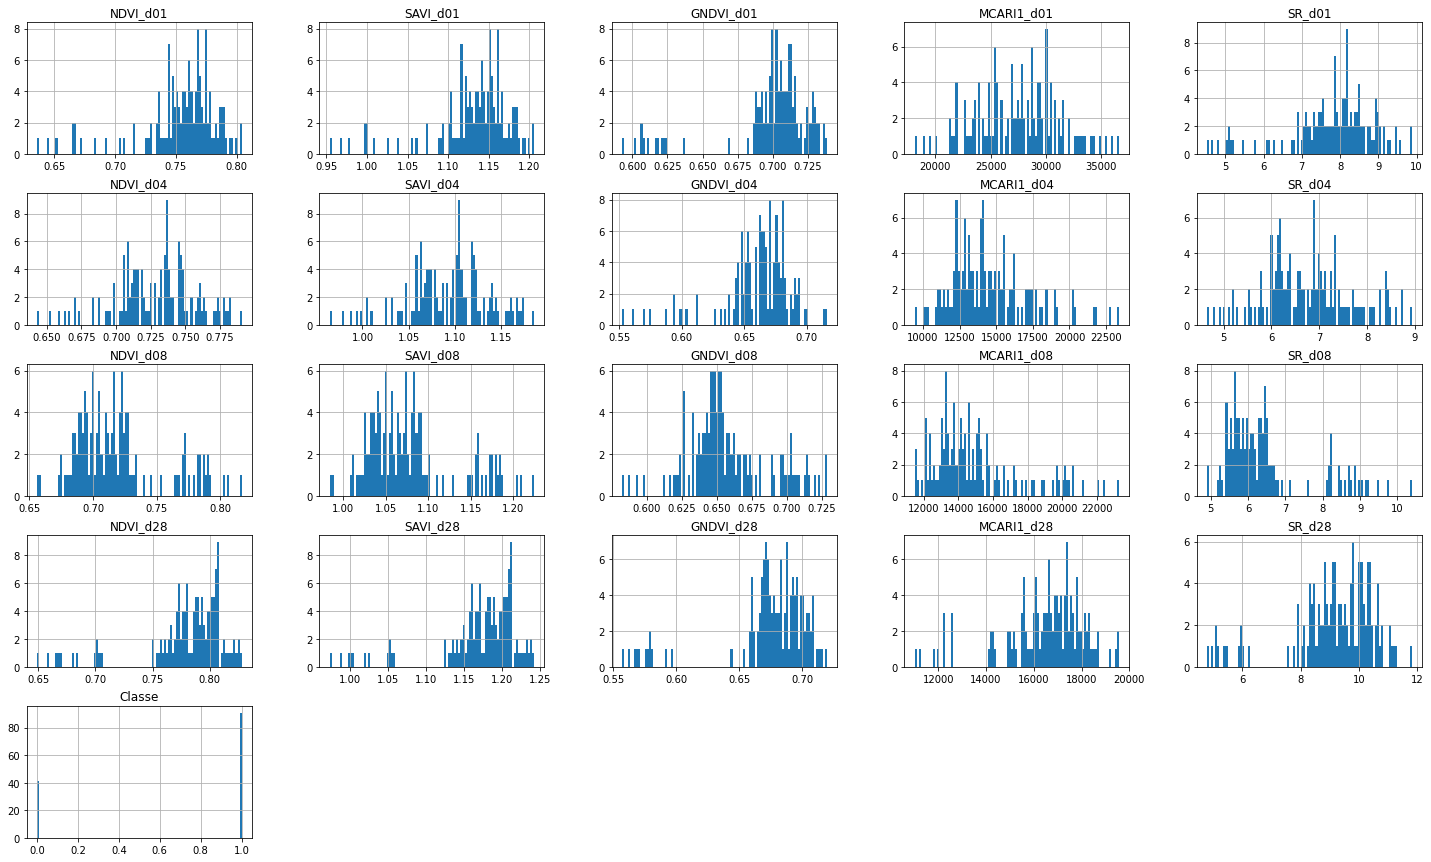

In [3]:
df.hist(bins=100, figsize=(25, 15))


Com a análise do histograma percebemos a diminuição dos índices em d1, d4 e d8. Em d28 acompanhamos um aumento, mas a diferença de tempo da medida d28 para a d8 é de 20 dias, ou seja, 5 vezes mais tempo que o intervalo das três primeiras medidas, o que faria que as plantas estivessem naturalmente maiores, com mais folhagens. No entanto, não excluiremos essa coluna porque as classes levaram em conta esse dado.

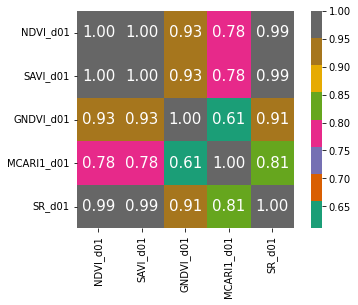

In [4]:
colunas_d01 = ['NDVI_d01', 'SAVI_d01', 'GNDVI_d01', 'MCARI1_d01', 'SR_d01']
correl_matriz_d01 = df[colunas_d01].corr()
heatmap_d01 = sns.heatmap(correl_matriz_d01, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=colunas_d01, xticklabels=colunas_d01, cmap='Dark2')
                      


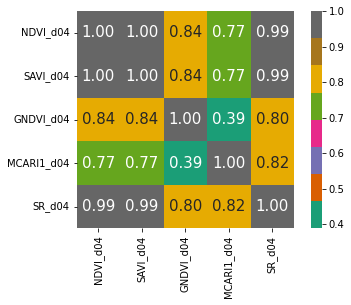

In [5]:
colunas_d04 = ['NDVI_d04', 'SAVI_d04', 'GNDVI_d04', 'MCARI1_d04', 'SR_d04']
correl_matriz_d04 = df[colunas_d04].corr()
heatmap_d04 = sns.heatmap(correl_matriz_d04, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
    'size': 15}, yticklabels=colunas_d04, xticklabels=colunas_d04, cmap='Dark2')

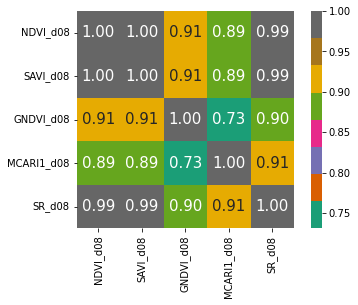

In [6]:
colunas_d08 = ['NDVI_d08', 'SAVI_d08', 'GNDVI_d08', 'MCARI1_d08', 'SR_d08']
correl_matriz_d08 = df[colunas_d08].corr()
heatmap_d08 = sns.heatmap(correl_matriz_d08, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
    'size': 15}, yticklabels=colunas_d08, xticklabels=colunas_d08, cmap='Dark2')

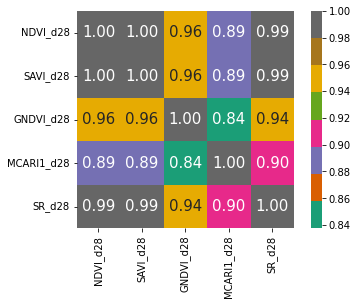

In [7]:
colunas_d28 = ['NDVI_d28', 'SAVI_d28', 'GNDVI_d28', 'MCARI1_d28', 'SR_d28']
correl_matriz_d28 = df[colunas_d28].corr()
heatmap_d28 = sns.heatmap(correl_matriz_d28, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
    'size': 15}, yticklabels=colunas_d28, xticklabels=colunas_d28, cmap='Dark2')

Podemos ver pela matrizes de correlação que os IVs têm correlações que variam de moderada a muito forte dependendo do dia da medição. No geral, as correlações são fortes (o que é esperado, uma vez que alguns desses índices são cálculos ajustados entre si).

### **Preparando os dados** 

Será utilizado o KNN para algoritmo classificatório. Para isso, será necessário separar o conjunto entre as entradas do modelo e as classes.

In [8]:
# Retirando a coluna "Classe" para isolar o x
entradas = df.drop(columns='Classe')
# Determinando a coluna classe como y
classes = df.Classe

print(
    f"Formato das tabelas de dados {entradas.shape} e classes {classes.shape}")


Formato das tabelas de dados (132, 20) e classes (132,)


### **Separando os dados em treino e teste**
O train_test split vai separar 25% dos dados de teste e treinar os outros 75% de forma aleatória para que não haja viés, ou seja, para que a distribuição considere todos os dados e não apenas um grupo deles.
OBS: O valor de 0.25 do tamanho do teste foi colocado de acordo com o apresentado na palestra supracitada.

In [9]:

entradas_treino, entradas_teste, classes_treino, classes_teste = train_test_split(entradas, classes, test_size=0.25)


### **Treinamento do modelo**
Optamos pela aplicação do modelo de KNN considerando um aprendizado supervisionado de classificação.
Para isso, precisamos ter os valores mais adequados de k.

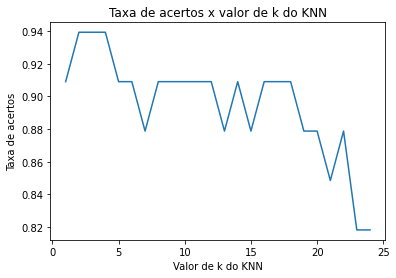

In [10]:
# Realizando o loop for para diferentes valores de k
k_range = list(range(1, 25))
acertos = []
for k in k_range:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(entradas_treino, classes_treino)
    classes_encontradas = modelo.predict(entradas_teste)
    acertos.append(accuracy_score(classes_teste, classes_encontradas))
#Pegar sempre o melhor valor de k
for i in acertos:
    if i == max(acertos):
        pos = acertos.index(i)
        melhorK = pos + 1

plt.plot(k_range, acertos)
plt.xlabel('Valor de k do KNN')
plt.ylabel('Taxa de acertos')
plt.title('Taxa de acertos x valor de k do KNN')
plt.show()


In [11]:

# Treinando o modelo
k = melhorK #de acordo com o melhor resultado de k
modelo = KNeighborsClassifier(n_neighbors=k)

modelo.fit(entradas_treino, classes_treino)


#Realizar predições
classes_encontradas = modelo.predict(entradas_teste)
print("Predição: {}".format(classes_encontradas))



Predição: [1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1]


### **Análise do modelo**
Analisando os resultados do modelo

#### **Acurácia**

A acurácia é uma fórmula simples que calcula a razão entre o número de acertos e o total de entradas. Ela dá uma ideia geral da quantidade de acertos do modelo, ou seja, é a proximidade de um resultado com o seu valor de referência real. Portanto, quanto maior o nível de acuracidade, mais próximo da referência ou valor real é o resultado encontrado.

In [12]:
# Acurácia para análise do modelo
acertos = accuracy_score(classes_teste, classes_encontradas)
print("Acerto médio de classificação: ", acertos)


Acerto médio de classificação:  0.9393939393939394


A medida de acurácia, no entanto, dá um peso semelhante a falsos negativos e falsos positivos. Isso significa que em um modelo com acurácia de 90%, 10 tomates serão classificados errôneamente, mas não saberemos se como falso positivos ou falso negativos. Isso pode ter um peso grande porque se todos os 10 tomates forem falso positivo para presença de genes resistentes à requeima, eles na realidade estarão susceptíveis à praga.

#### **Matriz de confusão**

A matriz de confusão faz uma análise do modelo contando em cada quadrado a quantidade de falsos positivos e falsos negativos, dando um panorama do comportamento do modelo. Com essa visualização, é possível tomar decisões quanto ao ajuste dos hiperparâmetros, quanto a necessidade de testar outros modelos ou até mesmo modificar o dataset, dependendo do contexto em que o modelo será aplicado. Nos quadrados diagonais azul e amarelo (direção esquerda-direita) estão os verdadeiro-negativos e verdadeiro-positivos (o que o modelo previu corretamente). Nos quadrados roxos (direção direita-esquerda) estão os falso-positivos e falso-negativos.

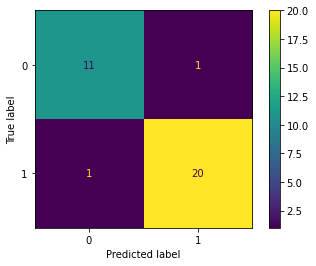

In [13]:
# Matriz de confusão
cm = confusion_matrix(classes_teste, classes_encontradas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo.classes_)
disp.plot()
plt.show()


#### Overfitting

O overfitting ocorre quando nos dados de treino, o modelo tem um desempenho excelente, porém nos dados de teste o resultado é ruim. Neste caso,  o modelo não tem capacidade de generalização, ou seja, não consegue extrapolar as predições para outros conjuntos de dados que não sejam aquele pelo qual ele foi treinado. 

#### Validação cruzada

Uma das formas de avaliar o overfitting é através do cálculo de acurácia utilizando a validação cruzada. O algoritmo aplicado divide o conjunto total de dados em k subconjuntos do mesmo tamanho. Um subconjunto é utilizado para teste e os outros são utilizados para estimação dos parâmetros, sendo que isso ocorre k vezes (ou, seja, cada subconjunto fornece uma acurácia). A média dessas acurácias fornece a acurácia de validação cruzada que não pode diferir muito da acurácia encontrada anteriormente no modelo.

Fazendo o desvio padrão da média, podemos estimar a consistência do modelo. Quanto mais baixo o desvio padrão, maior será a consistência, ou seja, melhor será sua capacidade de generalização.

É válido lembrar que utilizados o train_test_split, um método de hold-out que seria separar de forma aleatória uma parcela dos dados para testar o modelo, utilizando o restante para treinamento. No entanto, ele pode exercer uma influência na divisão de dados da métrica, dependendo dos dados que ele seleciona.

Deste modo, aplicamos no nosso modelo a validação cruzada, cujo resultado foi bem semelhante à acurácia previamente calculada e a consistência que apresentou um valor baixo. Portanto, consideramos também que não houve overfitting.

In [14]:
# Validação cruzada

scores = cross_val_score(modelo, entradas_treino, classes_treino, cv=5, scoring='accuracy')
consistencia = np.std(scores)
val_cruzada = scores.mean()

print(f' Acurácia validação cruzada:{val_cruzada}')
print(f' Consistência do modelo: {consistencia}')

 Acurácia validação cruzada:0.9189473684210526
 Consistência do modelo: 0.025427099640381368
